## method.ipynb得出的前10特征

In [11]:
f1_corrs=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

## 划分

In [12]:
import pandas as pd
import numpy as np
import os

project_path = os.getcwd()
# 加载数据
train_data = pd.read_csv(project_path + '/data/kaggle_house_pred_train.csv')
# 按数值类与非数值类分开
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(exclude=[np.number])
print('数值类特征数量：' + str(len(train_data_num.columns)) + ' 非数值类特征数量：' + str(len(train_data_cat.columns)))
print('数值类特征：', train_data_num.columns)
# 剔除Id和SalePrice
train_data_num = train_data_num.drop(['Id'], axis=1)
train_data_num = train_data_num.drop(['SalePrice'], axis=1)

print('数值类特征：', train_data_num.columns)
print("数值类特征数量：", len(train_data_num.columns))

数值类特征数量：38 非数值类特征数量：43
数值类特征： Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
数值类特征： Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fir

## 决定对这36个特征进行处理，画出原始图存档

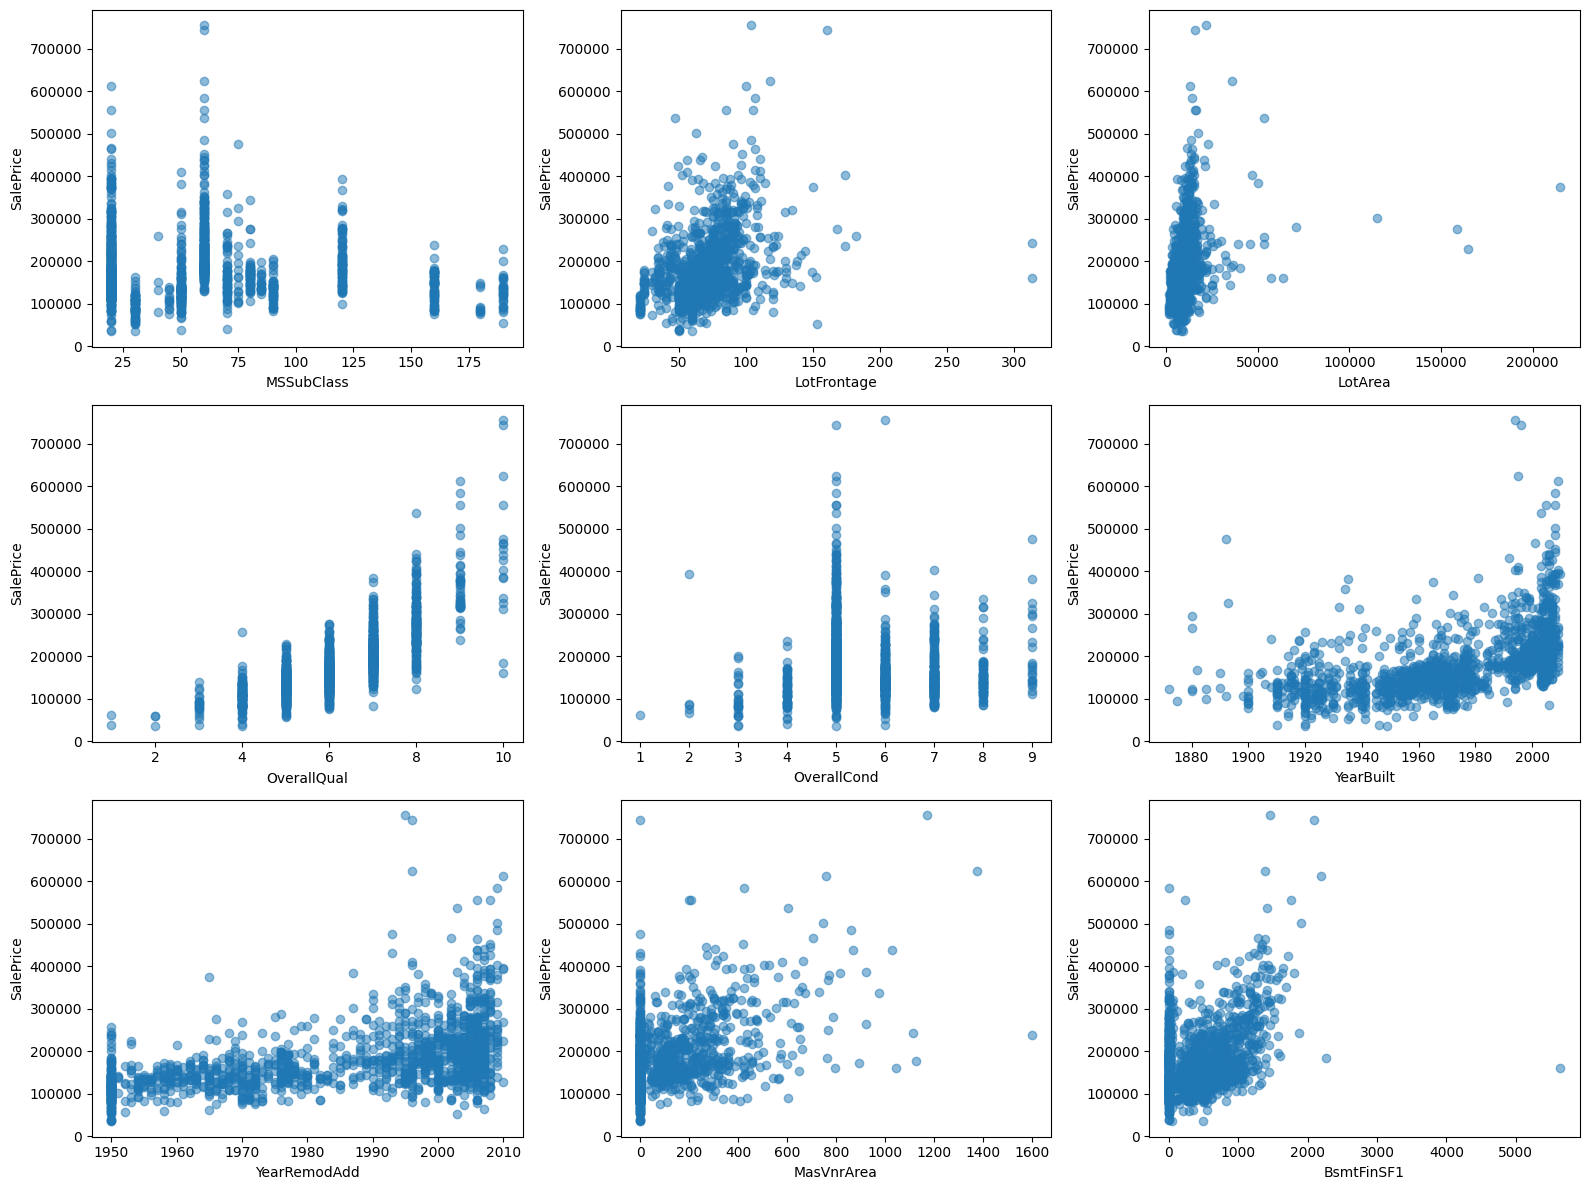

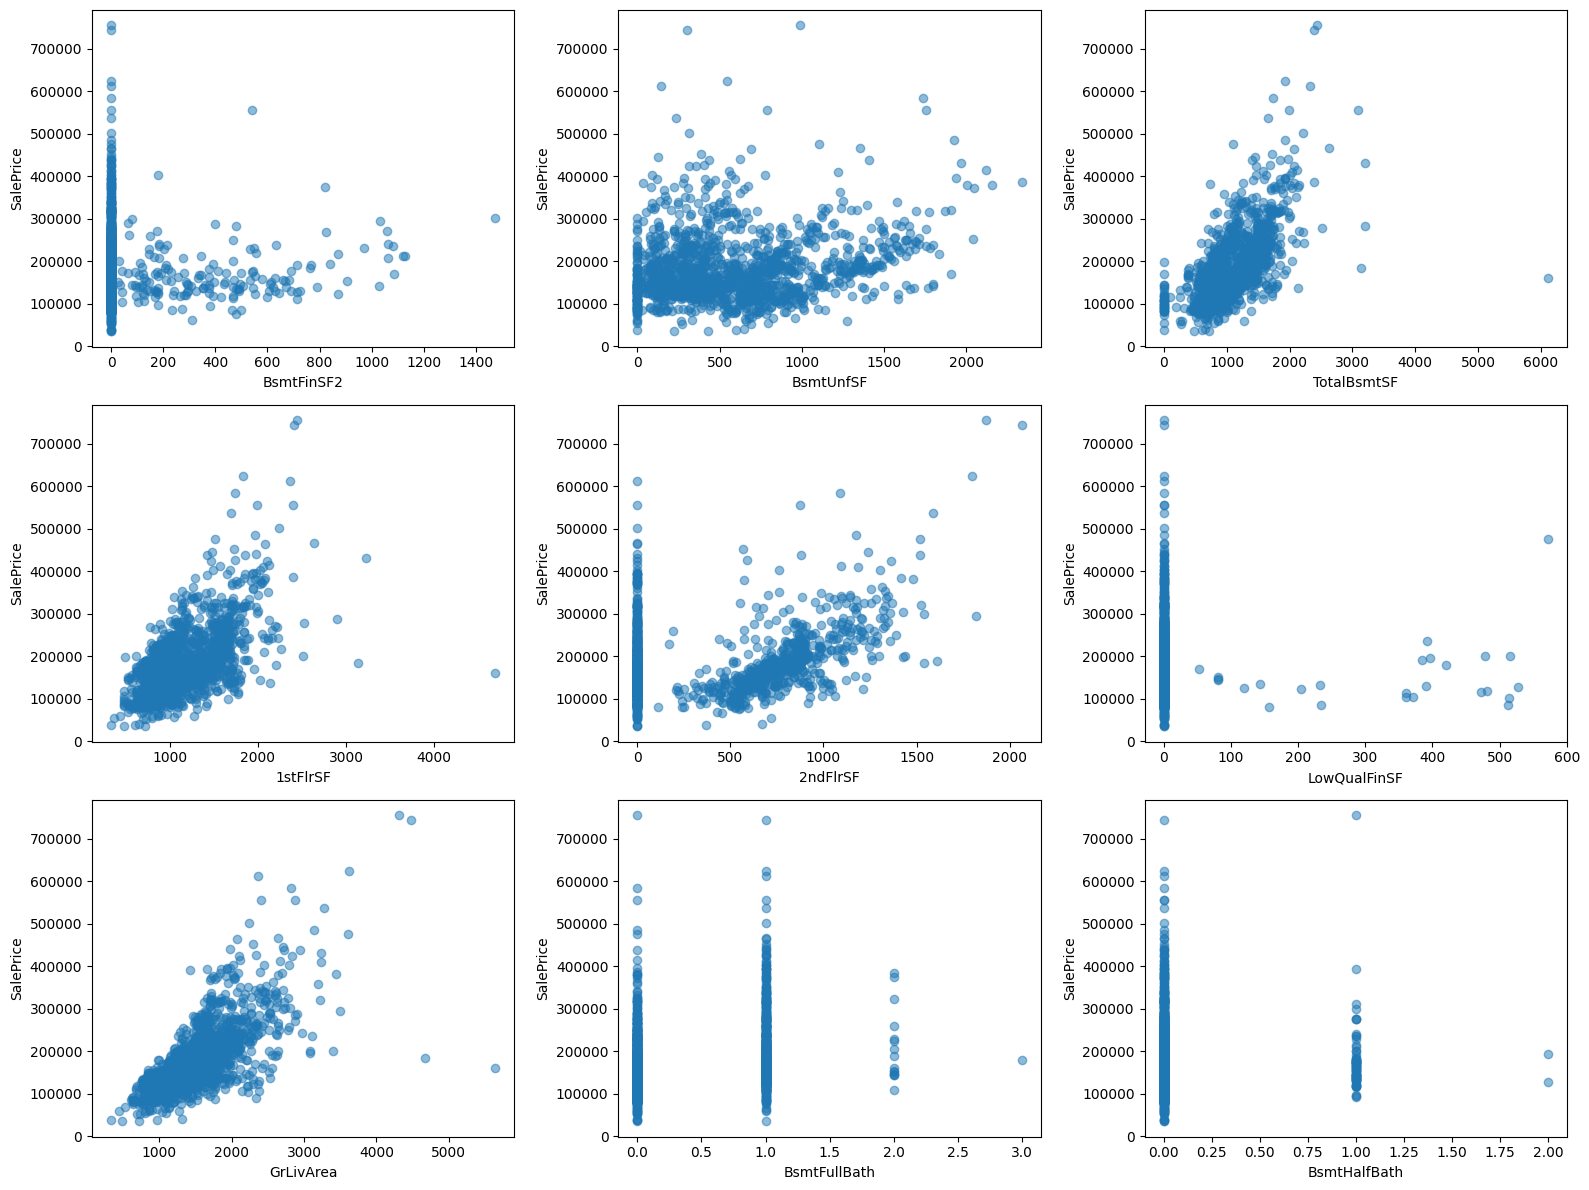

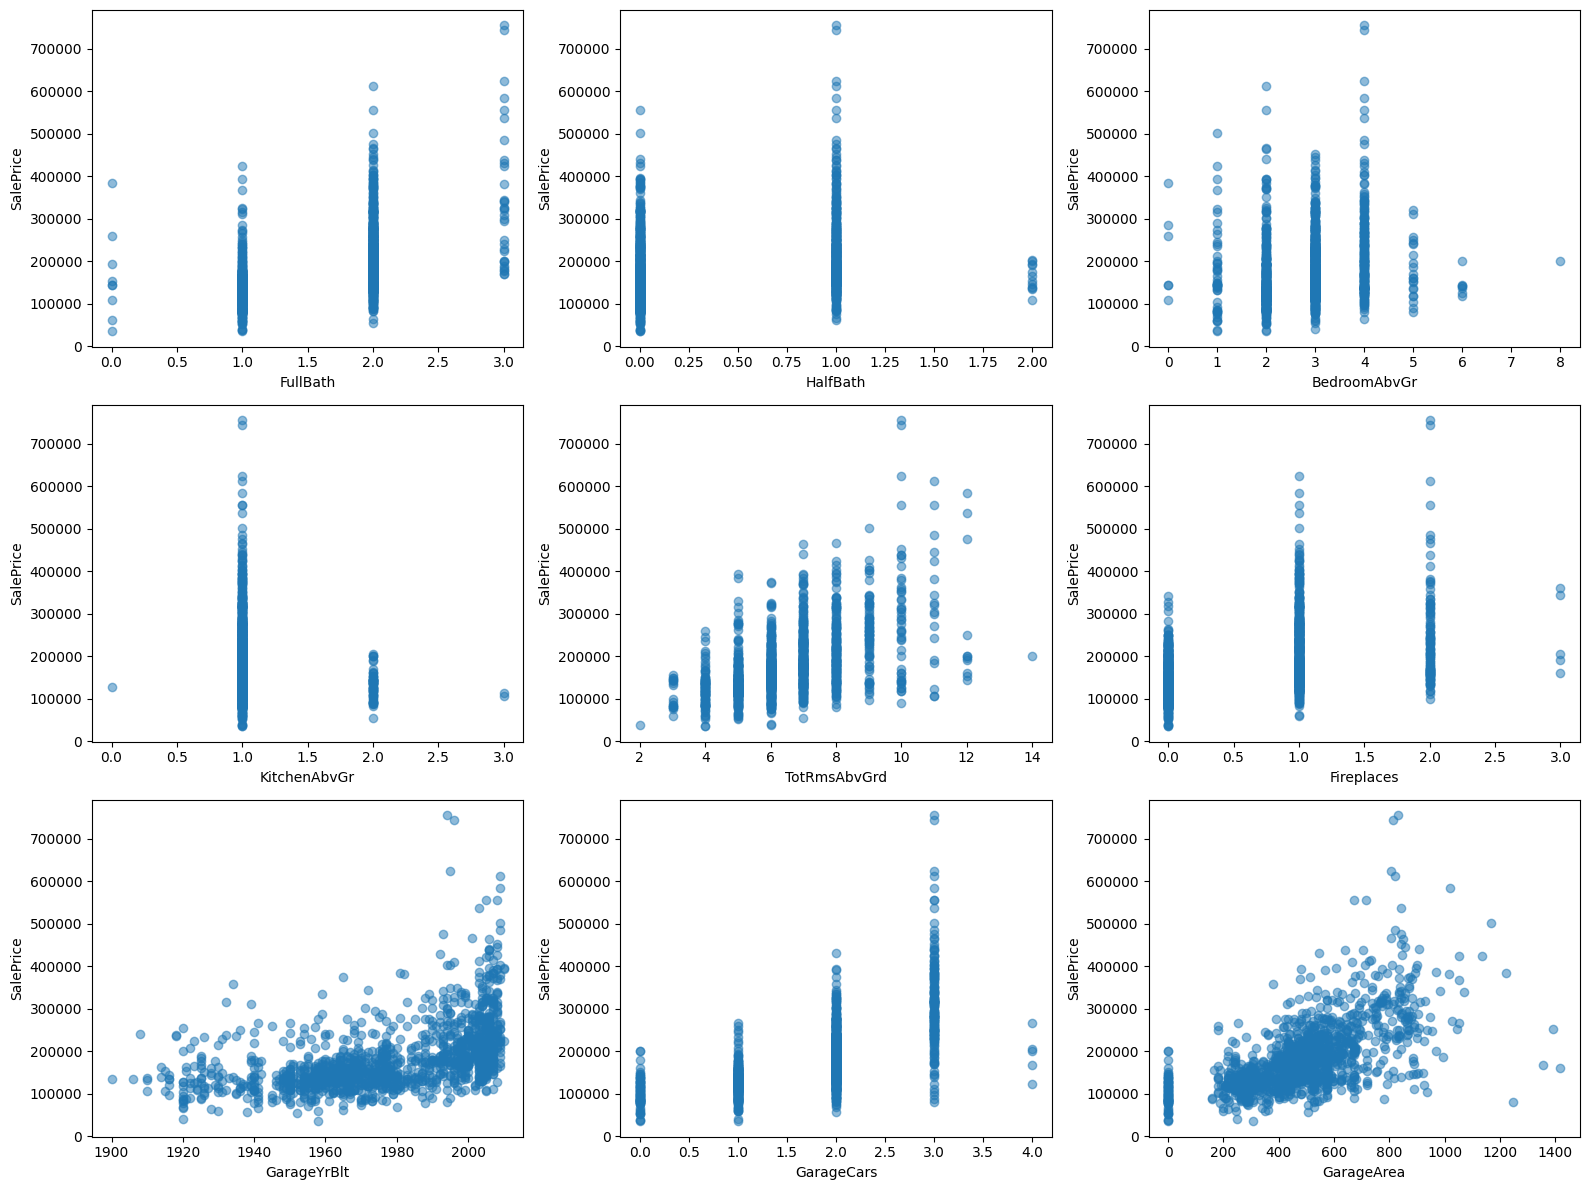

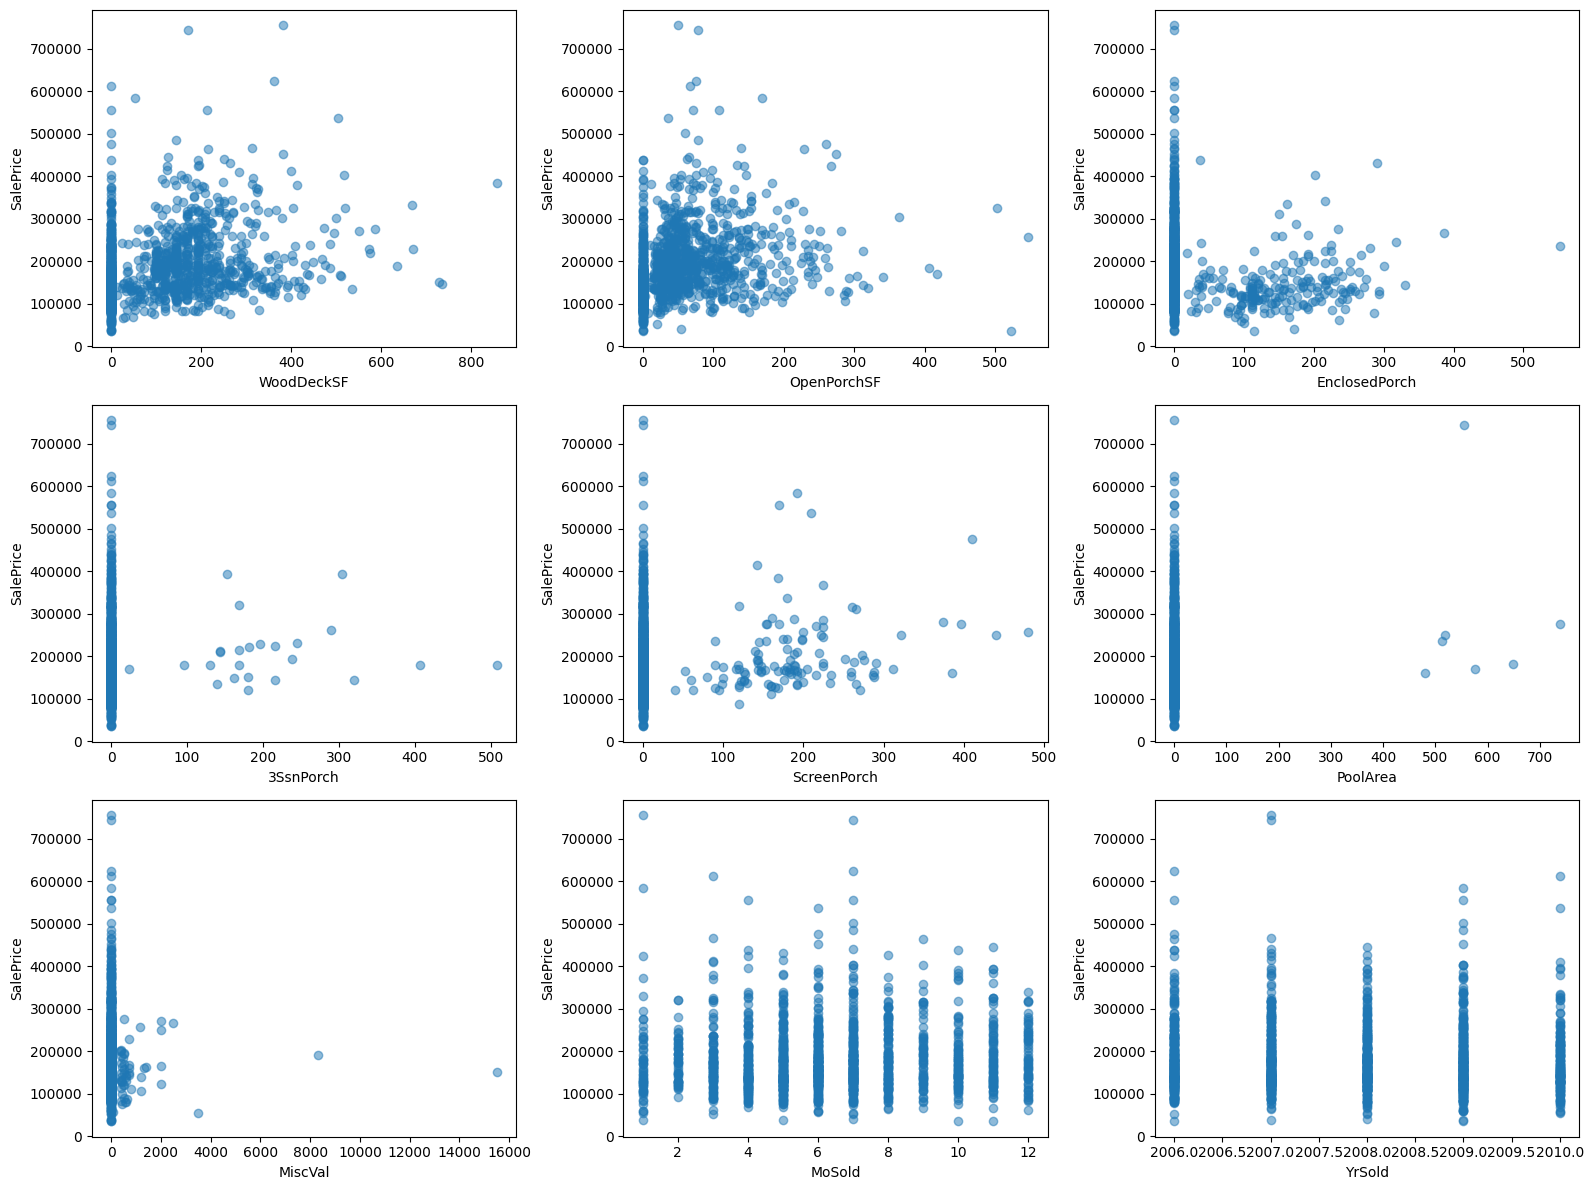

<Figure size 1600x1200 with 0 Axes>

In [13]:
# 画4张3*3的图
import matplotlib.pyplot as plt

fig_num = 1
sub_count = 1
fig = plt.figure(fig_num, figsize=(16, 12))

for feature in train_data:
    if feature not in train_data_num:
        continue
    plt.subplot(3, 3, sub_count)
    plt.scatter(train_data[feature], train_data['SalePrice'],alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    sub_count += 1
    if sub_count > 9:
        plt.tight_layout()
        plt.show()
        fig_num += 1
        fig = plt.figure(fig_num, figsize=(16, 12))
        sub_count = 1



## LOF检测和处理异常值

C:\Users\Eason\AppData\Local\Temp\ipykernel_14428\2978826361.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_data_cat = train_data.select_dtypes(include=[np.object])


删除异常值前的数据集大小: (1460, 81)


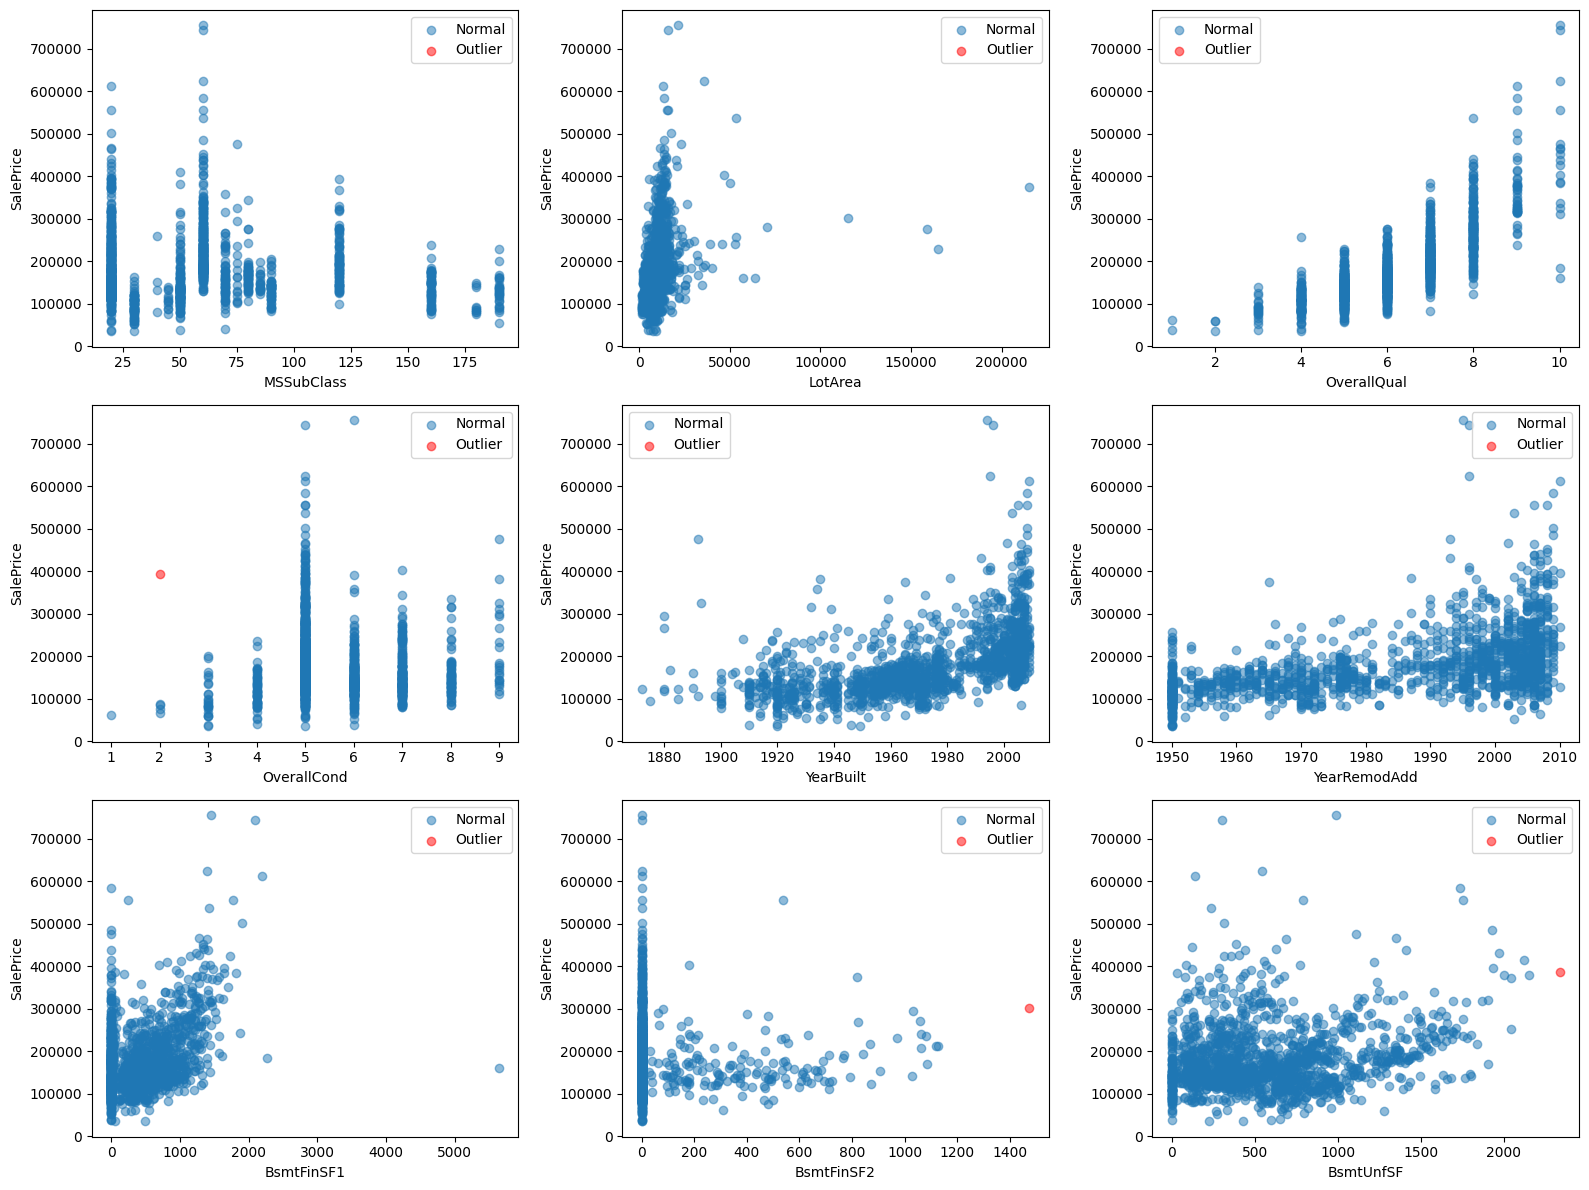

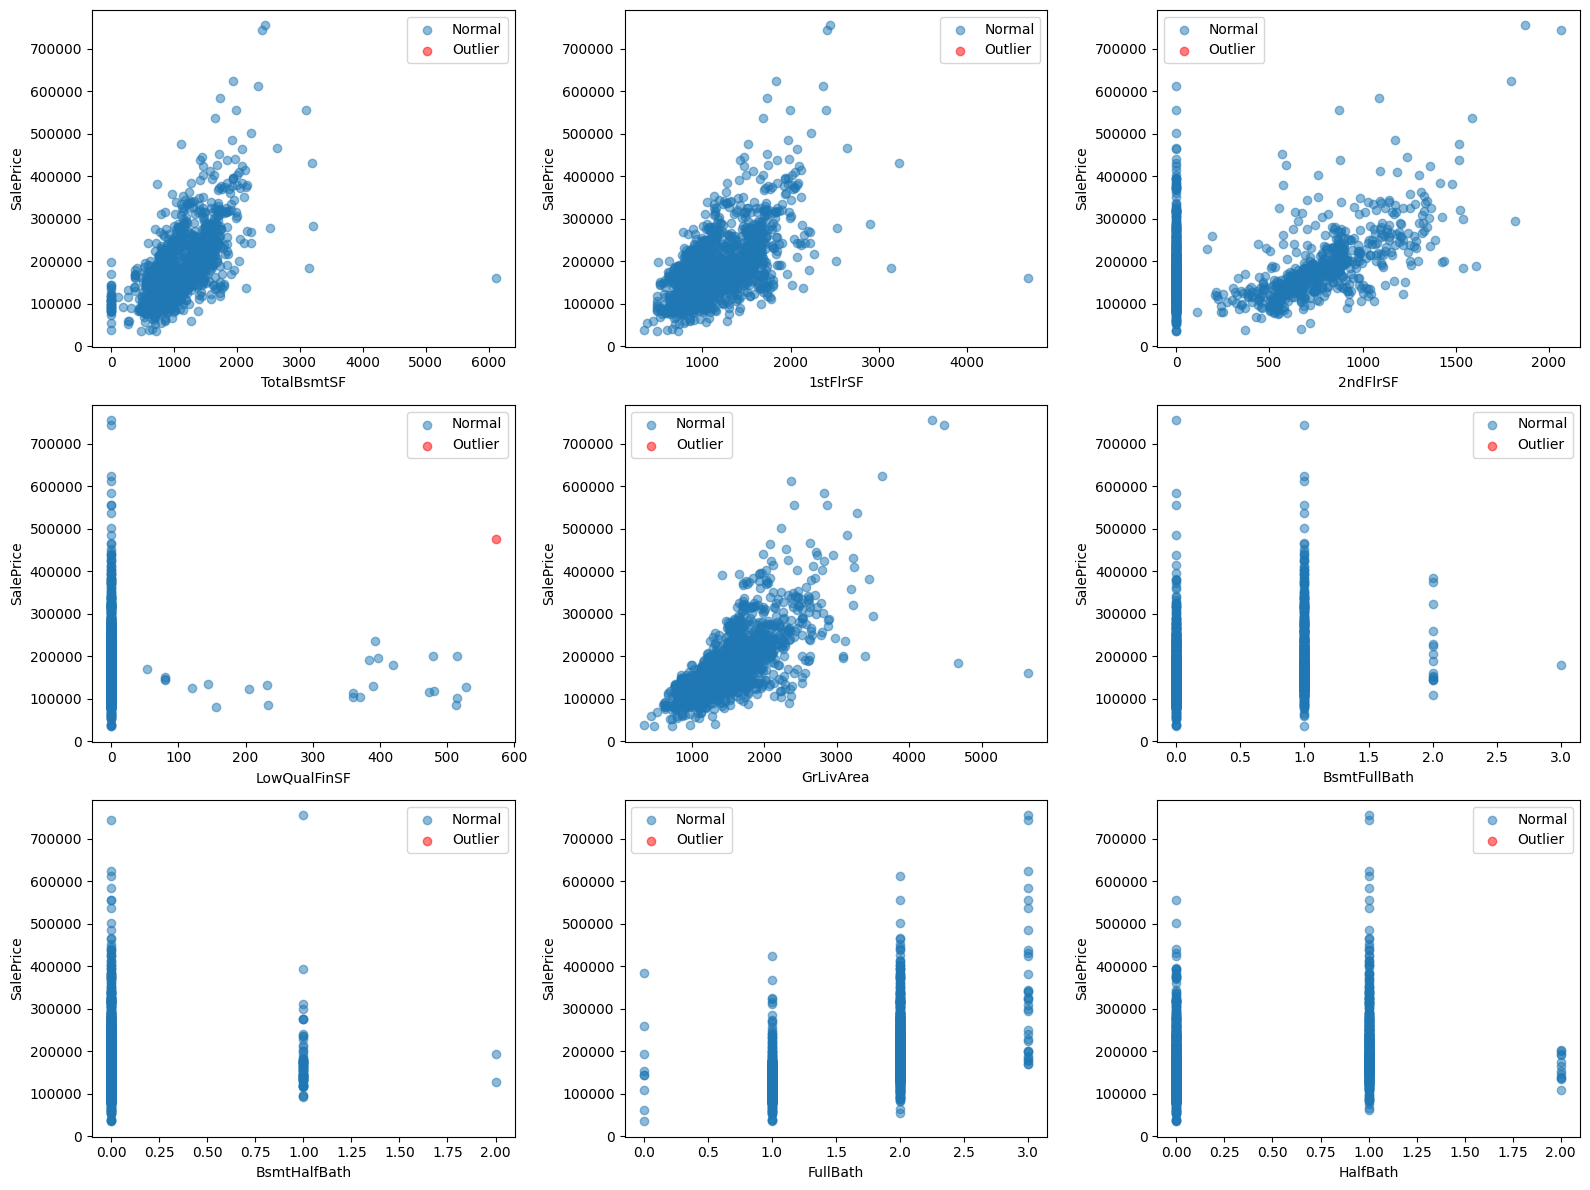

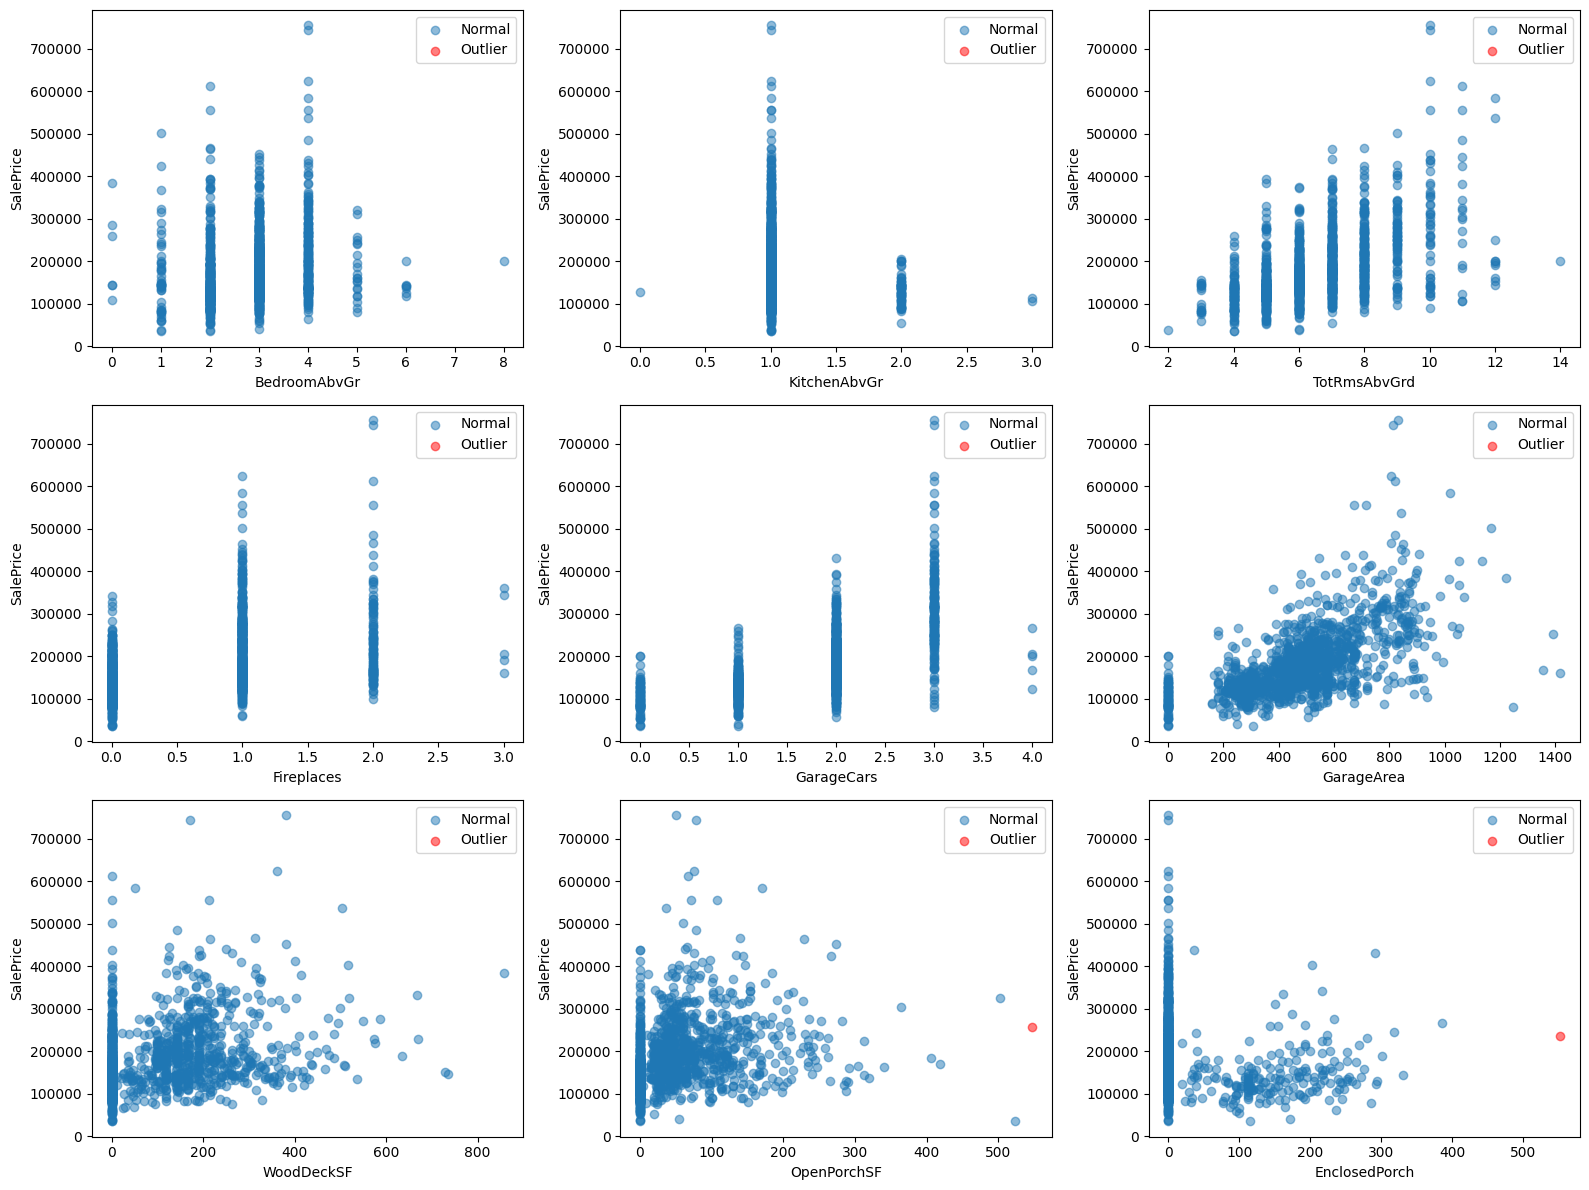

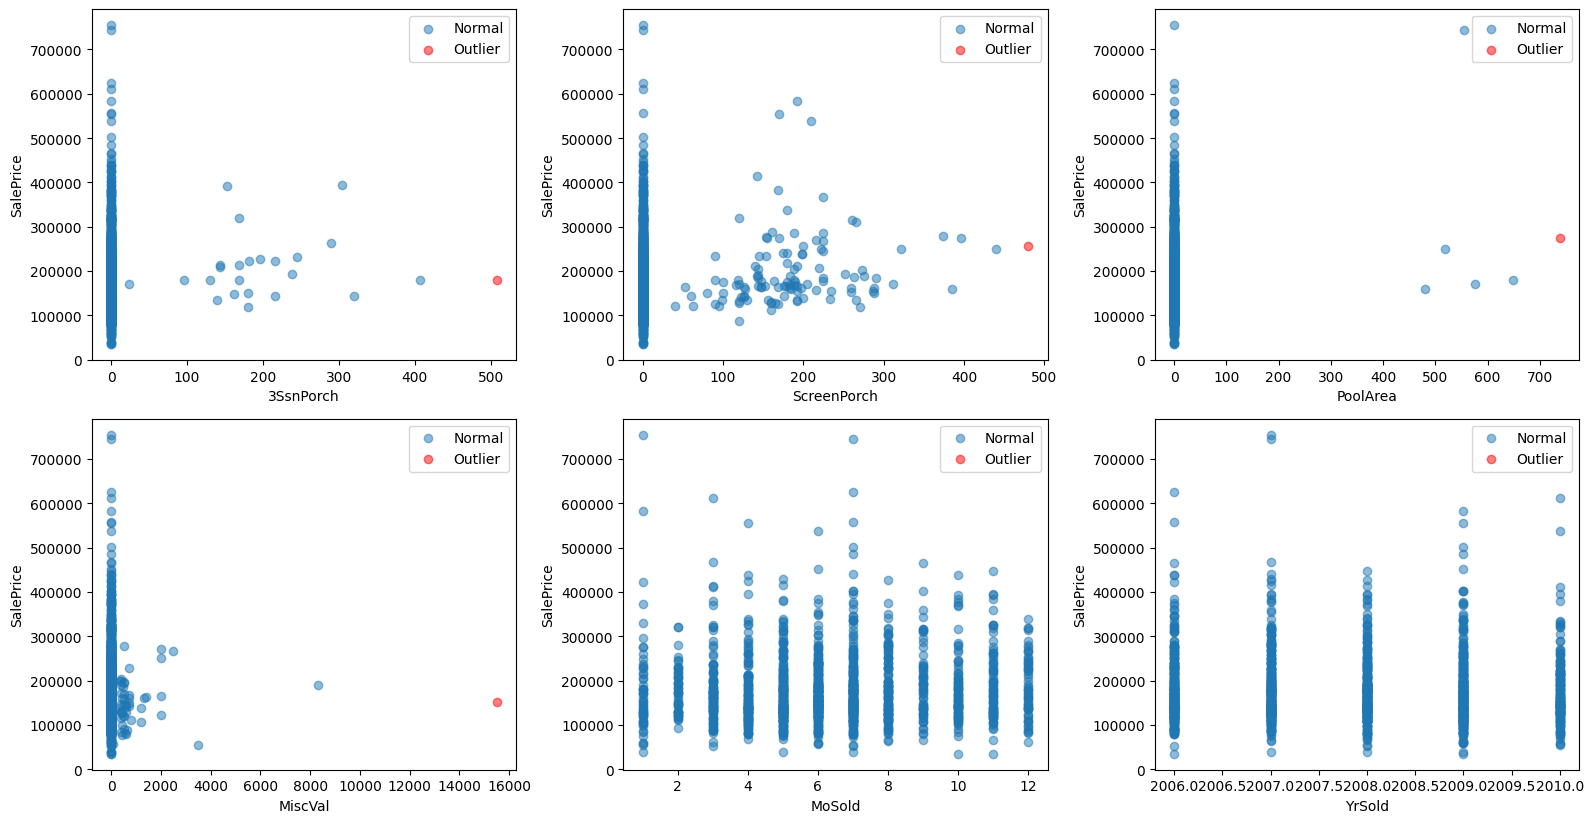

删除异常值后的数据集大小: (1451, 81)
33


In [14]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

project_path = os.getcwd()
# 加载数据
train_data = pd.read_csv(project_path + '/data/kaggle_house_pred_train.csv')
# 按数值类与非数值类分开
train_data_num = train_data.select_dtypes(include=[np.number])
train_data_cat = train_data.select_dtypes(include=[np.object])
# 剔除Id和SalePrice
train_data_num = train_data_num.drop(['Id'], axis=1)
train_data_num = train_data_num.drop(['SalePrice'], axis=1)
print('删除异常值前的数据集大小:', train_data.shape)

count = 1
fix_num = 0
outliers_indices = []   # 用于存储所有的异常值索引

fig_num = 1
sub_count = 1
fig = plt.figure(fig_num, figsize=(16, 12))

for feature in train_data.columns:
    # 若特征内有nan值，则continue
    if train_data[feature].isnull().sum() > 0:
        continue
    # 若特征为非数值类型，则continue
    if feature not in train_data_num.columns:
        continue
    # 创建LOF检测器
    lof = LocalOutlierFactor(n_neighbors=1000, contamination=0.0005)

    # 使用LOF检测器对数据进行拟合和预测
    y_pred = lof.fit_predict(train_data[feature].values.reshape(-1, 1))

    # 异常值被标记为-1，正常值被标记为1
    # 找出异常值
    outliers = train_data[y_pred == -1]

    '''
    此处修改异常值删除策略：
    '''


    # 若SalePrice>700000，则不删除
    if 'SalePrice' in outliers.columns:
        outliers = outliers[outliers['SalePrice'] < 700000]
    # 若OverallQual<2，则不删除
    if 'OverallQual' in outliers.columns:   
        outliers = outliers[outliers['OverallQual'] >= 2]

    if 'YearBuilt' in outliers.columns:
        outliers = outliers[outliers['YearBuilt'] > 1880]

    if 'BsmtFullBath' in outliers.columns:
        outliers = outliers[outliers['BsmtFullBath'] < 2]

    if 'BedroomAbvGr' in outliers.columns:
        outliers = outliers[outliers['BedroomAbvGr'] < 7]

    # if 'TotRmsAbvGrd' in outliers.columns:
    #     outliers = outliers[outliers['TotRmsAbvGrd'] < 0]


    # 增加overallcond==2 且 saleprice>300000的条件
    if feature == 'OverallCond': 
        # 找到满足条件的点
        extra_outliers_indices = train_data[(train_data['OverallCond'] == 2) & (train_data['SalePrice'] > 300000)].index
        # 将这些点加入到outliers中
        outliers = pd.concat([outliers, train_data.loc[extra_outliers_indices]], axis=0)

        


        
    outliers_indices.extend(outliers.index.tolist())

    # if feature in ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']:

    # 绘制散点图，正常值用蓝色，异常值用红色
    plt.subplot(3, 3, sub_count)
    plt.scatter(train_data.loc[train_data.index.difference(outliers_indices), feature], train_data.loc[train_data.index.difference(outliers_indices), 'SalePrice'], alpha=0.5, label='Normal')
    plt.scatter(outliers[feature], outliers['SalePrice'], alpha=0.5, color='red', label='Outlier')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.legend()
    sub_count += 1
    if sub_count > 9:
        plt.tight_layout()
        plt.show()
        fig_num += 1
        fig = plt.figure(fig_num, figsize=(16, 12))
        sub_count = 1
    fix_num += 1

if sub_count > 1:
    plt.tight_layout()
    plt.show()

# 删除异常值
train_data = train_data.drop(outliers_indices)
print('删除异常值后的数据集大小:', train_data.shape)

print(fix_num)

边画边观察边调整